<a href="https://colab.research.google.com/github/VentureMikey/ALK2021BD/blob/main/28818_Biostatistics_Data_analytics_JUNE_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

In [2]:
HEART = pd.read_csv('/content/heart.csv')

In [3]:
HEART.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
HEART.shape

(303, 14)

In [5]:
HEART.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
HEART.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
HEART.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
HEART['thal'].unique()

array([1, 2, 3, 0])

In [9]:
HEART.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [10]:
HEART[HEART['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [11]:
HEART.loc[HEART['ca']==4, 'ca'] = np.NaN

In [12]:
HEART['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [13]:
HEART.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [14]:
HEART[HEART['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [15]:
HEART.loc[HEART['thal']==0, 'thal'] = np.NaN

In [16]:
HEART['thal'].unique()

array([ 1.,  2.,  3., nan])

In [17]:
HEART.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

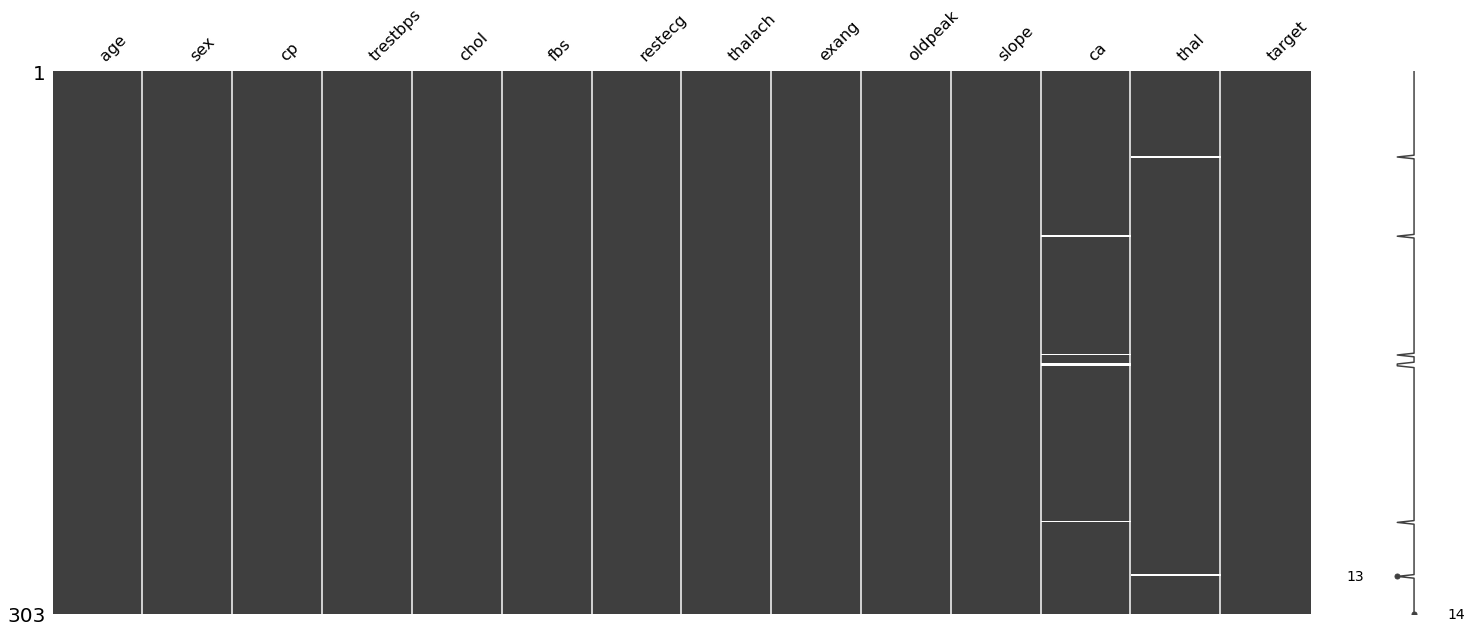

In [18]:
msno.matrix(HEART)

In [19]:
HEART=HEART.fillna(HEART.median())
HEART.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
DUPLICATED = HEART.duplicated().sum()

In [21]:
if DUPLICATED:
  print('Duplicated rows are : {}'.format(DUPLICATED))
else:
  print('There are no duplicates.')

Duplicated rows are : 1


In [22]:
DUPLICATED = HEART[HEART.duplicated(keep=False)]
DUPLICATED.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [23]:
HEART.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


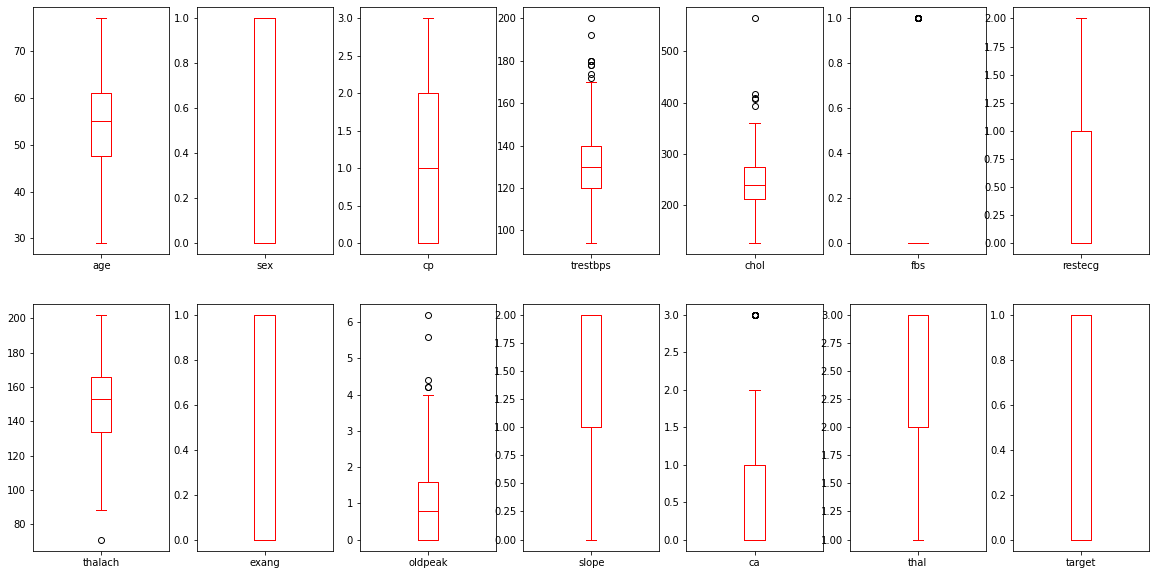

In [26]:
HEART.plot(kind='box', subplots=True, layout = (2,7),
           sharex=False, sharey=False, figsize=(20,10),
           color='red');

In [41]:
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(HEART_out, drop = False):
  for each_feature in HEART_out.columns:
    feature_data = HEART_out[each_feature]
    Q1 = np.percentile(feature_data, 25.)
    Q3 = np.percentile(feature_data, 75.)
    IQR = Q3-Q1
    outlier_step = IQR * 1.5
    outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print('For the variable {} total outliers found are {}'.format(each_feature, len(outliers)))
    if drop:
      print('Outliers from variable {} removed'.format(each_feature))

outliers(HEART[continous_features])



For the variable age total outliers found are 0
For the variable trestbps total outliers found are 9
For the variable chol total outliers found are 5
For the variable thalach total outliers found are 1
For the variable oldpeak total outliers found are 5


In [42]:
outliers(HEART[continous_features], drop = True)

Outliers from variable age removed
Outliers from variable trestbps removed
Outliers from variable chol removed
Outliers from variable thalach removed
Outliers from variable oldpeak removed


1    165
0    138
Name: target, dtype: int64


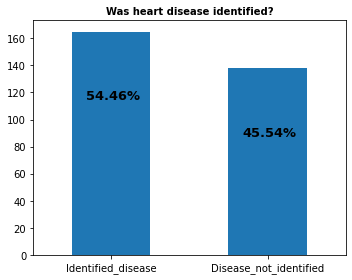

In [44]:
print(HEART.target.value_counts())

fig, ax=plt.subplots(figsize=(5,4))
name = ("Identified_disease", "Disease_not_identified")
ax = HEART.target.value_counts().plot(kind='bar')
ax.set_title("Was heart disease identified?", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize = 13,
          color = 'black', weight = 'bold')
plt.tight_layout()

1    165
0    138
Name: target, dtype: int64


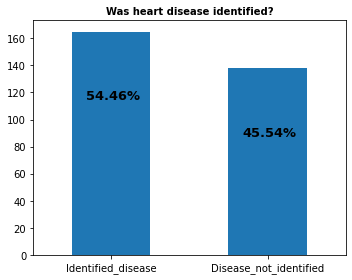

In [43]:
print(HEART.target.value_counts())

fig, ax=plt.subplots(figsize=(5,4))
name = ("Identified_disease", "Disease_not_identified")
ax = HEART.target.value_counts().plot(kind='bar')
ax.set_title("Was heart disease identified?", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize = 13,
          color = 'black', weight = 'bold')

plt.tight_layout()

Text(0.5, 1.0, 'Age Distribution Histogram')

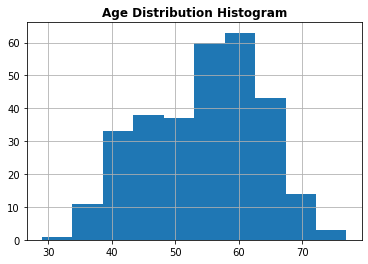

In [47]:
HEART['age'].hist().plot(kind='bar')
plt.title('Age Distribution Histogram', weight = 'bold')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

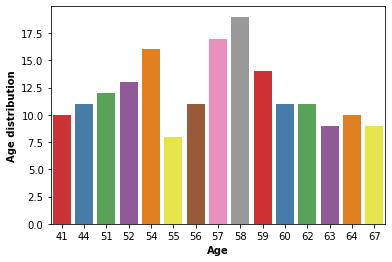

In [50]:
print(HEART.age.value_counts()[:15])
sns.barplot(x=HEART.age.value_counts()[:15].index,
y=HEART.age.value_counts()[:15].values,
palette='Set1')
plt.xlabel('Age', weight='bold')
plt.ylabel('Age distribution', weight='bold')